<a href="https://colab.research.google.com/github/Ananassio/Data-Science_lab/blob/main/week_5/5_a_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5: Returning to MNIST Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [5]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [6]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

In [7]:
np.shape(X)

(70000, 784)

In [8]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
X = np.array(X)
y = np.array(y)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [9]:
#randomly split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### E1.2: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [10]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
pred = bayes.predict(X_test)

In [11]:
#train error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [42]:
#Bayes
accuracy_score(y_test,bayes.predict(X_test))

0.5605714285714286

In [41]:
confusion_matrix(y_test,bayes.predict(X_test))

array([[ 939,    1,    6,    0,    3,    1,   36,    2,   28,   19],
       [   2, 1151,    3,    4,    0,    2,   11,    0,   22,   10],
       [ 104,   32,  313,   70,    4,    5,  244,    0,  237,   10],
       [  66,   49,    9,  383,    0,    6,   55,    8,  376,  129],
       [  36,    6,   14,    5,  139,    6,  103,    4,  213,  442],
       [ 115,   25,    6,   18,    3,   53,   53,    3,  592,  102],
       [  11,   21,    4,    0,    1,    4,  942,    0,   23,    3],
       [   5,    8,    2,   14,    6,    2,    2,  332,   30,  709],
       [  22,  121,    4,   10,    2,    2,   20,    2,  608,  225],
       [   6,    5,    6,    1,    5,    0,    1,   15,   22, 1026]])

In [14]:
# Simple linear model
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [15]:
slm = SGDClassifier(loss = 'log',max_iter=1000, tol=1e-3)

In [16]:
slm.fit(X_train, y_train)

SGDClassifier(loss='log')

In [43]:
pred_slm = slm.predict(X_test)

In [44]:
accuracy_score(y_test,pred_slm)

0.8842857142857142

In [45]:
confusion_matrix(y_test,bayes.predict(X_test))

array([[ 939,    1,    6,    0,    3,    1,   36,    2,   28,   19],
       [   2, 1151,    3,    4,    0,    2,   11,    0,   22,   10],
       [ 104,   32,  313,   70,    4,    5,  244,    0,  237,   10],
       [  66,   49,    9,  383,    0,    6,   55,    8,  376,  129],
       [  36,    6,   14,    5,  139,    6,  103,    4,  213,  442],
       [ 115,   25,    6,   18,    3,   53,   53,    3,  592,  102],
       [  11,   21,    4,    0,    1,    4,  942,    0,   23,    3],
       [   5,    8,    2,   14,    6,    2,    2,  332,   30,  709],
       [  22,  121,    4,   10,    2,    2,   20,    2,  608,  225],
       [   6,    5,    6,    1,    5,    0,    1,   15,   22, 1026]])

In [26]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [32]:
RFC = RandomForestClassifier( random_state=0)

In [33]:
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
pred_RFC = RFC.predict(X_test)

In [38]:
accuracy_score(y_test,pred_RFC)

0.9674285714285714

In [39]:
confusion_matrix(y_test,bayes.predict(X_test))

array([[ 939,    1,    6,    0,    3,    1,   36,    2,   28,   19],
       [   2, 1151,    3,    4,    0,    2,   11,    0,   22,   10],
       [ 104,   32,  313,   70,    4,    5,  244,    0,  237,   10],
       [  66,   49,    9,  383,    0,    6,   55,    8,  376,  129],
       [  36,    6,   14,    5,  139,    6,  103,    4,  213,  442],
       [ 115,   25,    6,   18,    3,   53,   53,    3,  592,  102],
       [  11,   21,    4,    0,    1,    4,  942,    0,   23,    3],
       [   5,    8,    2,   14,    6,    2,    2,  332,   30,  709],
       [  22,  121,    4,   10,    2,    2,   20,    2,  608,  225],
       [   6,    5,    6,    1,    5,    0,    1,   15,   22, 1026]])

In [46]:
#ROC
from sklearn.metrics import roc_auc_score,  roc_curve, auc

#get the 5
y_five = y_test=='5' #get bool lables=='5' - NOTE original lables are strings! Generates Mask
bayes_five = bayes.predict_proba(X_test)[:,5] #get probability prediction for '5' 

slm_five = slm.predict_proba(X_test)[:,5]

RFC_five = RFC.predict_proba(X_test)[:,5]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:445: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


In [48]:
bayes_fpr, bayes_tpr, _ = roc_curve(y_five.astype(int), bayes_five)
bayes_roc_auc = auc(bayes_fpr, bayes_tpr)

#slm_fpr, slm_tpr, _ = roc_curve(y_five.astype(int), slm_five)
#slm_roc_auc = auc(slm_fpr, slm_tpr)

RFC_fpr, RFC_tpr, _ = roc_curve(y_five.astype(int), RFC_five)
RFC_roc_auc = auc(RFC_fpr, RFC_tpr)



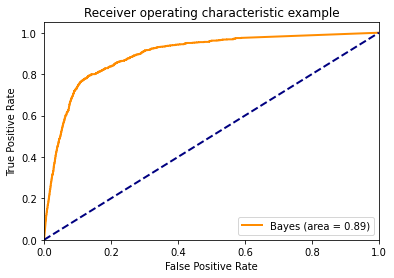

In [49]:
lw = 2
plt.plot(bayes_fpr, bayes_tpr, color='darkorange',
         lw=lw, label='Bayes (area = %0.2f)' % bayes_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

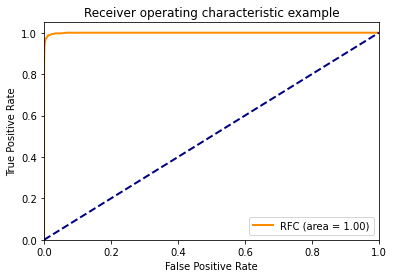

In [50]:
lw = 2
plt.plot(RFC_fpr, RFC_tpr, color='darkorange',
         lw=lw, label='RFC (area = %0.2f)' % RFC_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()